# Imports :

In [2]:
import numpy as np
import math
import scipy.io
import csv
from IPython.display import display
from scipy import sparse
import os.path
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from sklearn.feature_extraction.text import CountVectorizer
import re
from collections import Counter
from nltk.corpus import stopwords
import sklearn.neighbors, sklearn.linear_model, sklearn.ensemble, sklearn.naive_bayes
import time
import matplotlib.pyplot as plt
nltk.download("stopwords") 
nltk.download('punkt')
nltk.download('movie_reviews')
#removing stopwords
from nltk import word_tokenize,sent_tokenize

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews


## drawing tools
# Load libraries

# Math
import numpy as np

# Visualization 
%matplotlib notebook 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage

# High-res visualization (but no rotation possible)
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')

# Print output of LFR code
import subprocess

# Sparse matrix
import scipy.sparse
import scipy.sparse.linalg

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# Import data
import scipy.io

# Import functions in lib folder
import sys
sys.path.insert(1, 'lib')

# Import helper functions
%load_ext autoreload
%autoreload 2

# Import distance function
import sklearn.metrics.pairwise

# Remove warnings
import warnings
warnings.filterwarnings("ignore")




def find_between_r( s, first, last ):
    try:
        start = s.rindex( first ) + len( first )
        end = s.rindex( last, start )
        return s[start:end]
    except ValueError:
        return ""

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


# Datasets & Preprocessing

** Sentimental Analysis Text dataset: **

In [3]:
SAT_data =[]
with open('Projectdataset/Sentiment Analysis Dataset.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')#, quotechar='|')
    for row in spamreader:
        SAT_data.append(row) 
SAT_data = SAT_data[2:]
SAT_data = [[row[1],row[3]] for row in SAT_data]
SAT_data = np.array(SAT_data)
SAT_data[:,0] = [int(float(x))*5 for x in SAT_data[:,0]]
SAT_data_chunk = SAT_data[0:8000]
print('Length = {} '.format(len(SAT_data)))
print('Type = {}'.format(type(SAT_data)))
print(SAT_data[0:5])


Length = 1578613 
Type = <class 'numpy.ndarray'>
[['0' '                   I missed the New Moon trailer...']
 ['5' '              omg its already 7:30 :O']
 ['0'
  "          .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mins)..."]
 ['0' '         i think mi bf is cheating on me!!!       T_T']
 ['0' '         or i just worry too much?        ']
 ['5' '       Juuuuuuuuuuuuuuuuussssst Chillin!!']
 ['0' '       Sunny Again        Work Tomorrow  :-|       TV Tonight']
 ['5' '      handed in my uniform today . i miss you already']
 ['5' '      hmmmm.... i wonder how she my number @-)']
 ['0' '      I must think about positive..']]


** Polarity Data: **

In [6]:
polarity_data = []
file1 = open("Projectdataset/rt-polaritydata/rt-polarity.neg", "r")
file2 = open("Projectdataset/rt-polaritydata/rt-polarity.pos", "r")
dataneg = file1.readlines();
datapos = file2.readlines();
dataneg = [i.replace('\n','') for i in dataneg]
datapos = [i.replace('\n','') for i in datapos]

zero = np.zeros(len(dataneg))
dataneg = np.column_stack ((zero , dataneg) )

one = 5*np.ones(len(datapos))
datapos = np.column_stack ((one , datapos) )

polarity_data = np.concatenate ((datapos,dataneg), axis = 0)
np.random.shuffle(polarity_data)
polarity_data[:,0] = [int(float(x)) for x in polarity_data[:,0]]

print('Length = {} '.format(len(polarity_data)))
print('Type = {}'.format(type(polarity_data)))
print(polarity_data[0:5])

Length = 10662 
Type = <class 'numpy.ndarray'>
[['0' ' . . . hokey art house pretension . ']
 ['5' "despite the film's shortcomings , the stories are quietly moving . "]
 ['0'
  'parker updates the setting in an attempt to make the film relevant today , without fully understanding what it was that made the story relevant in the first place . ']
 ..., 
 ['5'
  'hollywood ending is not show-stoppingly hilarious , but scathingly witty nonetheless . ']
 ['5'
  "it's a coming-of-age story we've all seen bits of in other films -- but it's rarely been told with such affecting grace and cultural specificity . "]
 ['5' "it's a bittersweet and lyrical mix of elements . "]]


** Amazon dataset: **

In [7]:
Amazon_data = []
file4 = open("Projectdataset/amazonMP3reviews/amazon_mp3", "r")
data4 = file4.read()

data4 = data4.split("#####")
for i in range(1,len(data4)):
    text = find_between_r( data4[i], "[fullText]:", "[rating]" )
    text = text.replace("\n",'')
    rating = find_between_r( data4[i],"[rating]:","[recommend]")
    Amazon_data.append([float(rating),text])
Amazon_data = np.asarray(Amazon_data)
Amazon_data_chunk = Amazon_data[0:8000]
Amazon_data[:,0] = [int(float(x)) for x in Amazon_data[:,0]]
print('Length = {} '.format(len(Amazon_data)))
print('Type = {}'.format(type(Amazon_data)))
print(Amazon_data[0:5])


Length = 31000 
Type = <class 'numpy.ndarray'>
[['2'
  "It is good if you have internet than you can download the stuff, else, you can't  "]
 ['5'
  "The RIO rocks! It is so great that Diamond Multimedia prevailed in their fight against the forces of pure evil in the music industry and allowed us, the public, to have the RIO! This little baby holds your MP3's and plays  them with outrageous quality and no moving parts! You simply cannot make  the music &quot;skip&quot;. Take it jogging, bob sledding, whatever! The  Rio is cute and compact, battery lasts forever, runs great and is really  simple to use. Works well with the PC linkup, etc. A hot item!  "]
 ['4'
  'I had high hopes for the Diamond Rio and it certainly lived up 2 the hype. Lightweight and excellent quality with some good connecting software. My only gripe can be with memory. You definately need another 32Mb to store  your music. If you want one, my advice is to wait for the new upgraded  version with 64Mb and a graphic equ

** TripAdvisor dataset **

In [8]:
tripAdvisor_data1 = []
path = 'Projectdataset/tripadvisor/Aspects'
dirs = os.listdir(path)


for direct in dirs:
    #print(direct)
    file5 = open(path+'/'+direct, "r")
    data5 = file5.read()
    data5 = data5.split("<Author>")
    data5 = data5[1:]
    for data in data5:
        ignore = False;
        text = find_between_r( data, "<Content>", "<Date>")
        text = text.replace("\n",'')
        rank = find_between_r( data, "<Rating>", "<Aspects>")
        rank = rank.rstrip().split('\t') 
        if (rank ==['']):
                ignore = True
        if not (ignore): 
            rank = [float(x) for x in rank]
            rank =round(np.mean(rank))
            tripAdvisor_data1.append((rank, text))
       
        
            


In [10]:
tripAdvisor_data2=np.asarray(tripAdvisor_data1[0:9000])
#tripAdvisor_data1=np.asarray(tripAdvisor_data1)
#tripAdvisor_data1=np.array(tripAdvisor_data1)
print('Length = {} '.format(len(tripAdvisor_data1)))
print('Type = {}'.format(type(tripAdvisor_data1)))
print(tripAdvisor_data1[0:5])


Length = 198979 
Type = <class 'list'>
[(4.0, "Wonderful time- even with the snow! What a great experience! From the goldfish in the room (which my daughter loved) to the fact that the valet parking staff who put on my chains on for me it was fabulous. The staff was attentive and went above and beyond to make our stay enjoyable. Oh, and about the parking: the charge is about what you would pay at any garage or lot- and I bet they wouldn't help you out in the snow!  "), (4.0, "Lovely hotel, unique decor, friendly front desk staff, central location It's only recently that I've started staying at boutique hotels, so I'm definitely not an expert on the subtleties that these types of establishments provide. But I've already stayed at a few Kimptons and I must say that my experiences are mostly good. Hotel Monaco is no exception. The decor at the Kimpton Hotels is always unique - they have a wonderful way of pulling off colors, textures and patterns so one feels cool and trendy yet comfortab

** Sorted Data ACL **

In [12]:
#################################### Books ######################################################
books_data = []
file7 = open('Projectdataset/sorted_data_acl/books/negative.review', "r")
file8 = open('Projectdataset/sorted_data_acl/books/positive.review', "r")

negative = file7.read()
positive = file8.read()
######## books
negative = negative.split("<review>")
positive = positive.split("<review>")
negative = negative[1:]
positive = positive[1:]

a = []
b = []
for neg in negative:
    text = find_between_r( neg, "<review_text>", "</review_text>")
    text = text.replace("\n",'')
    rate = find_between_r( neg, "<rating>", "</rating>")
    a.append((rate,text))
    
for pos in positive:
    text = find_between_r( pos, "<review_text>", "</review_text>")
    text = text.replace("\n",'')
    rate = find_between_r( pos, "<rating>", "</rating>")
    b.append((rate,text))

books_data = np.concatenate((a,b) , axis = 0)
np.random.shuffle(books_data)
print("books review")
print('Length = {} '.format(len(books_data)))
print('Type = {}'.format(type(books_data)))
#print(books_data)

#################################### DVDs ######################################################
DVD_dataset= []
file9 = open('Projectdataset/sorted_data_acl/dvd/negative.review', "r")
file10 = open('Projectdataset/sorted_data_acl/dvd/positive.review', "r")
negative = file9.read()
positive = file10.read()

negative = negative.split("<review>")
positive = positive.split("<review>")
negative = negative[1:]
positive = positive[1:]

a = []
b = []
for neg in negative:
    text = find_between_r( neg, "<review_text>", "</review_text>")
    text = text.replace("\n",'')
    rate = find_between_r( neg, "<rating>", "</rating>")
    a.append((rate,text))
    
for pos in positive:
    text = find_between_r( pos, "<review_text>", "</review_text>")
    text = text.replace("\n",'')
    rate = find_between_r( pos, "<rating>", "</rating>")
    b.append((rate,text))


DVD_dataset = np.concatenate((a,b) , axis = 0)
np.random.shuffle(DVD_dataset)
print("dvds_review")
print('Length = {} '.format(len(DVD_dataset)))
print('Type = {}'.format(type(DVD_dataset)))
#print(DVD_dataset)

#################################### Electronics ######################################################
electronics_data = []
file11 = open('Projectdataset/sorted_data_acl/electronics/negative.review', "r")
file12 = open('Projectdataset/sorted_data_acl/electronics/positive.review', "r")

negative = file11.read()
positive = file12.read()

negative = negative.split("<review>")
positive = positive.split("<review>")
negative = negative[1:]
positive = positive[1:]

a = []
b = []
for neg in negative:
    text = find_between_r( neg, "<review_text>", "</review_text>")
    text = text.replace("\n",'')
    rate = find_between_r( neg, "<rating>", "</rating>")
    a.append((rate,text))
    
for pos in positive:
    text = find_between_r( pos, "<review_text>", "</review_text>")
    text = text.replace("\n",'')
    rate = find_between_r( pos, "<rating>", "</rating>")
    b.append((rate,text))

electronics_data = np.concatenate((a,b) , axis = 0)
np.random.shuffle(electronics_data)
print("electronics_review")
print('Length = {} '.format(len(electronics_data)))
print('Type = {}'.format(type(electronics_data)))
#print(electronics_data)
########################################## kitchen_&_housewares ##############################################
kh_dataset = []
file13 = open('Projectdataset/sorted_data_acl/kitchen_&_housewares/negative.review', "r")
file14 = open('Projectdataset/sorted_data_acl/kitchen_&_housewares/positive.review', "r")

negative = file13.read()
positive = file14.read()

negative = negative.split("<review>")
positive = positive.split("<review>")
negative = negative[1:]
positive = positive[1:]

a = []
b = []
for neg in negative:
    text = find_between_r( neg, "<review_text>", "</review_text>")
    text = text.replace("\n",'')
    rate = find_between_r( neg, "<rating>", "</rating>")
    a.append((rate,text))
    
for pos in positive:
    text = find_between_r( pos, "<review_text>", "</review_text>")
    text = text.replace("\n",'')
    rate = find_between_r( pos, "<rating>", "</rating>")
    b.append((rate,text))

kh_dataset = np.concatenate((a,b) , axis = 0)
np.random.shuffle(kh_dataset)
print("kh_review")
print('Length = {} '.format(len(kh_dataset)))
print('Type = {}'.format(type(kh_dataset)))

review_data = np.concatenate((books_data,DVD_dataset,electronics_data,kh_dataset))
np.random.shuffle(review_data)
print("review_data")
print('Length = {} '.format(len(review_data)))
print('Type = {}'.format(type(review_data)))
review_data[:,0] = [int(float(x)) for x in review_data[:,0]]
print(review_data[0:5])

books review
Length = 2000 
Type = <class 'numpy.ndarray'>
dvds_review
Length = 2000 
Type = <class 'numpy.ndarray'>
electronics_review
Length = 2000 
Type = <class 'numpy.ndarray'>
kh_review
Length = 2000 
Type = <class 'numpy.ndarray'>
review_data
Length = 8000 
Type = <class 'numpy.ndarray'>
[['2'
  "My introduction to Borges was through the collection Labyrinths. I immediately fell in love with the stories, the prose, the poetry, and so went on to buy this complete volume. While it is nice to have all Borges's stories in one place, and at a reasonable price, the language doesn't really hold up for me. The translation is... well, not sloppy, but too simple, like those childrens' versions of classic novels they pressed on you in 5th grade. I have nothing against Andrew Hurley, but his translation of Borges leaves me cold. I'd give Borges 5 stars out of 5, but Hurley? No more than 2."]
 ['1'
  'After serveral months of use, "Card Error" was shown on my Canon Digital Rebel for my 512MB

# Naive Bayes Classification
This classifier is only used when we have binary classification. Here we applied it just as a trial.

In [13]:
def word_feats(words):
        return dict([(word, True) for word in words])
    
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')
 
negfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in negids]
posfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in posids]

negcutoff = int(len(negfeats)*3/4)
poscutoff = int(len(posfeats)*3/4)

trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]
testfeats = negfeats[negcutoff:] + posfeats[poscutoff:]
print('train on %d instances, test on %d instances' % (len(trainfeats), len(testfeats)))
 
classifier = NaiveBayesClassifier.train(trainfeats)
print('accuracy:', nltk.classify.util.accuracy(classifier, testfeats))
classifier.show_most_informative_features()

train on 1500 instances, test on 500 instances
accuracy: 0.728
Most Informative Features
             magnificent = True              pos : neg    =     15.0 : 1.0
             outstanding = True              pos : neg    =     13.6 : 1.0
               insulting = True              neg : pos    =     13.0 : 1.0
              vulnerable = True              pos : neg    =     12.3 : 1.0
               ludicrous = True              neg : pos    =     11.8 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
             uninvolving = True              neg : pos    =     11.7 : 1.0
             fascination = True              pos : neg    =     10.3 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
                 idiotic = True              neg : pos    =      9.8 : 1.0


# Feature Extraction
** Bag of Words Feature Extraction ** 






In [14]:
def column(matrix, i):
    return [row[i] for row in matrix]
def compute_bag_of_words(text, nwords):
    vectorizer = CountVectorizer(max_features=nwords)
    vectors = vectorizer.fit_transform(text)
    vocabulary = vectorizer.get_feature_names()
    return vectors, vocabulary

nwords = 300 # number of words to represent text

# all datasets texts
text_polarity = column(polarity_data,1)
text_amazon = column(Amazon_data_chunk,1)
text_sat = column(SAT_data_chunk,1)
text_trip = column(tripAdvisor_data2,1)
text_items = column(review_data,1)
# all datasets ratings
Y_polarity = np.asarray(column(polarity_data,0))
Y_amazon = np.asarray(column(Amazon_data_chunk,0))
Y_sat = np.asarray(column(SAT_data_chunk,0))
Y_trip = np.asarray(column(tripAdvisor_data2,0))
Y_items = np.asarray(column(review_data,0))

names = ["Polarity Dataset","Amazon Dataset","SAT dataset","Trip Advisor","Items"]
texts = [text_polarity,text_amazon,text_sat,text_trip,text_items]
Ys = [Y_polarity , Y_amazon, Y_sat, Y_trip, Y_items]
stop_words = set(stopwords.words('english'))

filtered_data =[]
bows = []
i = 0

for textset in texts:
    filtered=[];
    for item in textset:
        words = word_tokenize(item)
        words =[word.lower() for word in words]
        filtered_item=[];
        for w in words:
            if w not in stop_words:
                filtered_item.append(w)
        result = ' '.join(filtered_item)
        filtered.append(result)
    bow, vocab = compute_bag_of_words(filtered, nwords)
    bows.append(bow)
    print("Dataset ={}".format(names[i]))
    print("Length = {}".format(len(filtered))) 
    print("bow = {}".format(bow.shape))
    print("Y = {}".format(Ys[i].shape))
    filtered_data.append(filtered)
    i += 1


Dataset =Polarity Dataset
Length = 10662
bow = (10662, 300)
Y = (10662,)
Dataset =Amazon Dataset
Length = 8000
bow = (8000, 300)
Y = (8000,)
Dataset =SAT dataset
Length = 8000
bow = (8000, 300)
Y = (8000,)
Dataset =Trip Advisor
Length = 9000
bow = (9000, 300)
Y = (9000,)
Dataset =Items
Length = 8000
bow = (8000, 300)
Y = (8000,)


# Dividing into Training data and Testing data

In [15]:

X_trains = []
X_tests = []
Y_trains = []
Y_tests = []
i = 0
for textset in texts:
    cutoff = math.ceil(len(Ys[i])*0.75)
    print(cutoff)
    X_trains.append(bows[i][0:cutoff])
    X_tests.append(bows[i][cutoff:])
    Y_trains.append(Ys[i][0:cutoff])
    Y_tests.append(Ys[i][cutoff:])
    i+=1


7997
6000
6000
6750
6000


# Classifiers and using the right one

In [16]:

# The different classifiers
clf, train_accuracy, test_accuracy, exec_time = [], [], [], []
clf.append(sklearn.neighbors.KNeighborsClassifier()) # k-NN classifier
clf.append(sklearn.svm.LinearSVC()) # linear SVM classifier
clf.append(sklearn.linear_model.LogisticRegression()) # logistic classifier
clf.append(sklearn.ensemble.RandomForestClassifier())
clf.append(sklearn.linear_model.RidgeClassifier())
clf.append(sklearn.naive_bayes.BernoulliNB())
clf.append(sklearn.naive_bayes.MultinomialNB())


train_accuracies = []
test_accuracies = []


# train on different datasets 
for i in range (0,len(names)):
    print("Dataset = {}".format(names[i]))
    classifier = ['KNN','SVM','Log-R','RanF', 'RC','B','MultiNB']
    j = 0
    train_accuracy = []
    test_accuracy = []
    for c in clf:
        #t_start = time.process_time()
        c.fit(X_trains[i], Y_trains[i])
        train_pred = c.predict(X_trains[i])
        test_pred = c.predict(X_tests[i])
        train_accuracy .append( '{:5.2f}'.format(100*sklearn.metrics.accuracy_score(Y_trains[i], train_pred)) )
        test_accuracy .append( '{:5.2f}'.format(100*sklearn.metrics.accuracy_score(Y_tests[i], test_pred)) )
        #exec_time.append('{:5.2f}'.format(time.process_time() - t_start))
        print('Classifier:          {}'.format(classifier[j]))
        print('Train accuracy:      {}'.format(train_accuracy[j]))
        print('Test accuracy:       {}'.format(test_accuracy[j]))
        j+=1
        #print('Execution time:      {}'.format(exec_time))
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

Dataset = Polarity Dataset
Classifier:          KNN
Train accuracy:      71.61
Test accuracy:       56.62
Classifier:          SVM
Train accuracy:      68.33
Test accuracy:       65.59
Classifier:          Log-R
Train accuracy:      68.39
Test accuracy:       65.70
Classifier:          RanF
Train accuracy:      91.60
Test accuracy:       61.73
Classifier:          RC
Train accuracy:      68.36
Test accuracy:       65.37
Classifier:          B
Train accuracy:      68.05
Test accuracy:       65.70
Classifier:          MultiNB
Train accuracy:      67.91
Test accuracy:       65.52
Dataset = Amazon Dataset
Classifier:          KNN
Train accuracy:      60.75
Test accuracy:       42.90
Classifier:          SVM
Train accuracy:      60.20
Test accuracy:       54.90
Classifier:          Log-R
Train accuracy:      60.85
Test accuracy:       54.20
Classifier:          RanF
Train accuracy:      99.08
Test accuracy:       46.60
Classifier:          RC
Train accuracy:      56.73
Test accuracy:       

'Dataset: Polarity Dataset '

'best test accuracy = 65.70  for = Log-R'

'Dataset: Amazon Dataset '

'best test accuracy = 54.90  for = SVM'

'Dataset: SAT dataset '

'best test accuracy = 70.10  for = MultiNB'

'Dataset: Trip Advisor '

'best test accuracy = 28.40  for = RC'

'Dataset: Items '

'best test accuracy = 53.80  for = SVM'

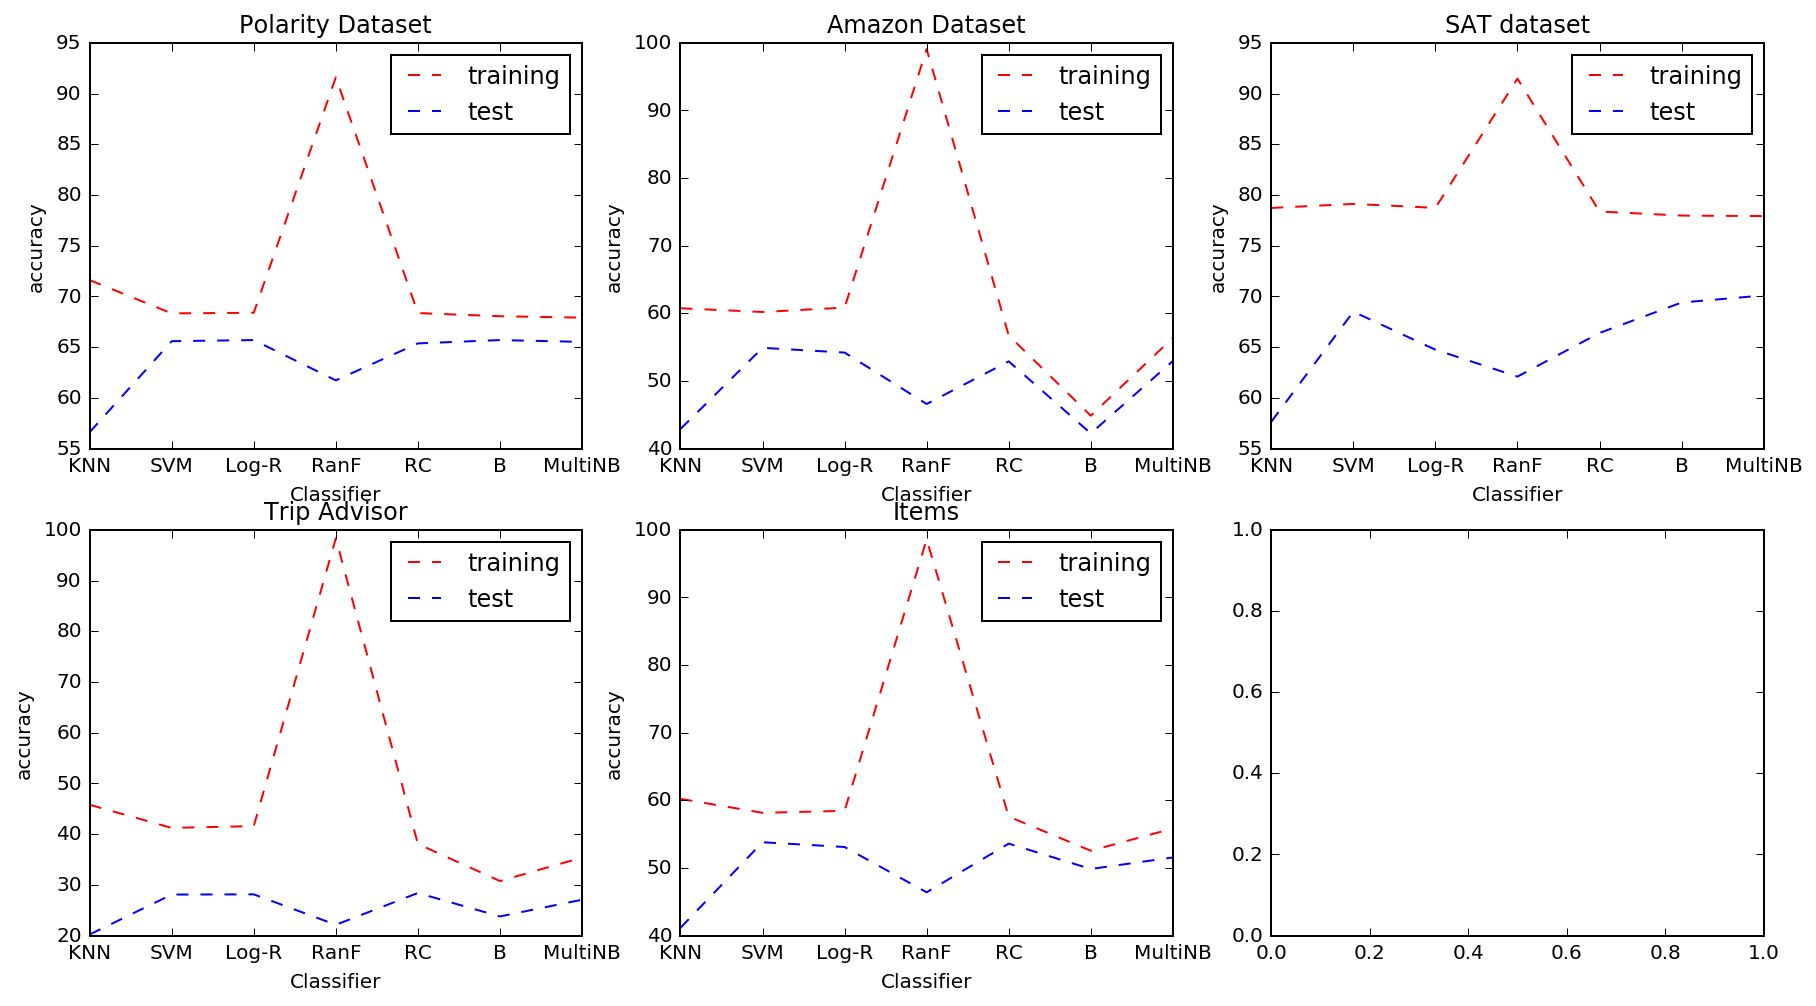

In [17]:
x =[0,1,2,3,4,5,6]
classifier = ['KNN','SVM','Log-R','RanF', 'RC','B','MultiNB']
Leg = ["training","test"]
n = 5
fig, axes = plt.subplots(2, 3, squeeze=True, figsize=(15, 8))
for i in range(n):
    axes[i//3,i%3].set_xticks(x)
    axes[i//3,i%3].set_xticklabels(classifier, fontdict=None, minor=False)
    axes[i//3,i%3].plot(x,train_accuracies[i],"r--",x,test_accuracies[i],"b--")
    axes[i//3,i%3].set_title(names[i])
    axes[i//3,i%3].set_ylabel("accuracy")
    axes[i//3,i%3].set_xlabel("Classifier")
    axes[i//3,i%3].legend(Leg)

for i in range(n):  
    display("Dataset: {} ".format(names[i]))
    value = max(test_accuracies[i])
    index = test_accuracies[i].index(value)
    display("best test accuracy = {}  for = {}".format(value,classifier[index]))
    
    
#plt.xticks(x,classifier)#,names,knn_test,"b--")
#plt.plot(x,train_accuracies[0],"r--",x,test_accuracies[0],"b--")



#plt.show()

# Incremental Learning 
Due to memory limitation we can't apply the classifier on the whole chunck of data at the same time.Therefore we use partial training of classifiers. However we separate the binary data (**SAT and polarity data**) and the ranking data (** Amazon and Review data**) for separate classifiers 

** Binary data **

In [73]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB

test_stats = {'n_test': 0, 'n_test_pos': 0}
def progress(cls_name, stats):
    """Report progress information, return a string."""
    duration = time.time() - stats['t0']
    s = "%20s classifier : \t" % cls_name
    s += "%(n_train)6d train docs (%(n_train_pos)6d positive) " % stats
    s += "%(n_test)6d test docs (%(n_test_pos)6d positive) " % test_stats
    s += "accuracy: %(accuracy).3f " % stats
    s += "in %.2fs (%5d docs/s)" % (duration, stats['n_train'] / duration)
    return s


#Overall_data = [SAT_data,Amazon_data,polarity_data,review_data]
Overall_data = [Amazon_data,review_data]
batches = []
#Y_polarity = np.unique(np.asarray(column(SAT_data,0)))
#Y_tripAdvisor = np.unique(np.asarray(column(tripAdvisor_data,0)))
#Y_tripAdvisor = [abs(x) for x in Y_tripAdvisor]
Y_amazon = np.unique(np.asarray(column(Amazon_data,0)))
#Y_sat = np.unique(np.asarray(column(polarity_data,0)))
Y_items = np.unique(np.asarray(column(review_data,0)))
#y_all =np.unique(np.concatenate((Y_polarity,Y_amazon,Y_sat,Y_items),axis = 0))
y_all =np.unique(np.concatenate((Y_amazon,Y_items),axis = 0))
print(y_all)
minibatch_size = 10000

# divide data into batches
i = 0
while (i<len(Overall_data)):
    start = 0
    trans = False
    leftover_len = 0
    while not(trans):
        if not(leftover_len == 0):
            batch = np.concatenate ((leftover , Overall_data[i][start:start + minibatch_size - leftover_len]), axis = 0)
            batches.append(batch)
            start = start + minibatch_size - leftover_len
            leftover_len = 0
        elif not (start + minibatch_size >= len(Overall_data[i]) ):
            batch = Overall_data[i][start:start + minibatch_size]
            batches.append(batch)
            start = start + minibatch_size
        else: 
            leftover_len = len(Overall_data[i]) - start
            leftover = Overall_data[i][start:]
            trans = True
            start = 0
            
        
    i += 1

        
#Classifiers      
partial_fit_classifiers = {
    'SGD': SGDClassifier(),
    'Perceptron': Perceptron(),
    'NB Multinomial': MultinomialNB(alpha=0.01),
    'Passive-Aggressive': PassiveAggressiveClassifier(),
}
        
                  
cls_stats = {}

for cls_name in partial_fit_classifiers:
    stats = {'n_train': 0, 'n_train_pos': 0,
             'accuracy': 0.0, 'accuracy_history': [(0, 0)], 't0': time.time(),
             'runtime_history': [(0, 0)], 'total_fit_time': 0.0}
    cls_stats[cls_name] = stats

number_minibatch = len(batches)
total_vect_time = 0.0
all_classes = np.array([0, 1 , 2, 3, 4 ,5])
    
print(number_minibatch)
# Main loop : iterate on mini-batches of examples
for i in range(number_minibatch):
    print("Batch number = {}".format(i))
    batch = batches[i]
    textset = column(batch,1)
    filtered=[]
    for item in textset:
        words = word_tokenize(item)
        words =[word.lower() for word in words]
        filtered_item=[];
        for w in words:
            if w not in stop_words:
                filtered_item.append(w)
        result = ' '.join(filtered_item)
        filtered.append(result)
    X, vocab = compute_bag_of_words(filtered, nwords)
    Y = column(batch,0)

    cutoff = math.ceil(len(Y)*0.75)
    X_train = X#[0:cutoff]
    X_test = X[cutoff:]
    y_train = Y#[0:cutoff]
    y_test = Y[cutoff:]
    test_stats['n_test'] += len(y_test)
    test_stats['n_test_pos'] += sum([int(x) for x in y_test])
    
    for cls_name, cls in partial_fit_classifiers.items():
        tick = time.time()
        # update estimator with examples in the current mini-batch
        cls.partial_fit(X_train, y_train, classes=y_all)

        # accumulate test accuracy stats
        cls_stats[cls_name]['total_fit_time'] += time.time() - tick
        cls_stats[cls_name]['n_train'] += X_train.shape[0]
        cls_stats[cls_name]['n_train_pos'] += sum([int(x) for x in y_train])
        tick = time.time()

        cls_stats[cls_name]['accuracy'] = cls.score(X_test, y_test)
        cls_stats[cls_name]['prediction_time'] = time.time() - tick
        acc_history = (cls_stats[cls_name]['accuracy'],
                       cls_stats[cls_name]['n_train'])
        cls_stats[cls_name]['accuracy_history'].append(acc_history)
        run_history = (cls_stats[cls_name]['accuracy'],
                       total_vect_time + cls_stats[cls_name]['total_fit_time'])
        cls_stats[cls_name]['runtime_history'].append(run_history)

        #if i % 10 == 0:
        print(progress(cls_name, cls_stats[cls_name]))
    #if i % 3 == 10:
        print('\n')

['0' '1' '2' '3' '4' '5']
161
Batch number = 0
                 SGD classifier : 	 10000 train docs ( 20945 positive)   2500 test docs (  7340 positive) accuracy: 0.678 in 2.56s ( 3905 docs/s)
          Perceptron classifier : 	 10000 train docs ( 20945 positive)   2500 test docs (  7340 positive) accuracy: 0.686 in 2.58s ( 3881 docs/s)
      NB Multinomial classifier : 	 10000 train docs ( 20945 positive)   2500 test docs (  7340 positive) accuracy: 0.714 in 2.58s ( 3881 docs/s)
  Passive-Aggressive classifier : 	 10000 train docs ( 20945 positive)   2500 test docs (  7340 positive) accuracy: 0.677 in 2.59s ( 3858 docs/s)
Batch number = 1
Batch number = 2
Batch number = 3
Batch number = 4
Batch number = 5
Batch number = 6
Batch number = 7
Batch number = 8
Batch number = 9
Batch number = 10
                 SGD classifier : 	110000 train docs (312280 positive)  27500 test docs ( 80880 positive) accuracy: 0.716 in 28.82s ( 3817 docs/s)
          Perceptron classifier : 	110000 train doc

# Performance and Visualization of Incremental Learning classifier 

In [74]:
#Performance of the classifiers 
print("Accuracy of SGD is {}".format(cls_stats['SGD']['accuracy']) )
print("Accuracy of Perceptron is {}".format(cls_stats['Perceptron']['accuracy']) )
print("Accuracy of NB Multinomial is {}".format(cls_stats['NB Multinomial']['accuracy']) )
print("Accuracy of Passive-Aggressive is {}".format(cls_stats['Passive-Aggressive']['accuracy']) )



Accuracy of SGD is 0.6216
Accuracy of Perceptron is 0.6132
Accuracy of NB Multinomial is 0.516
Accuracy of Passive-Aggressive is 0.6316


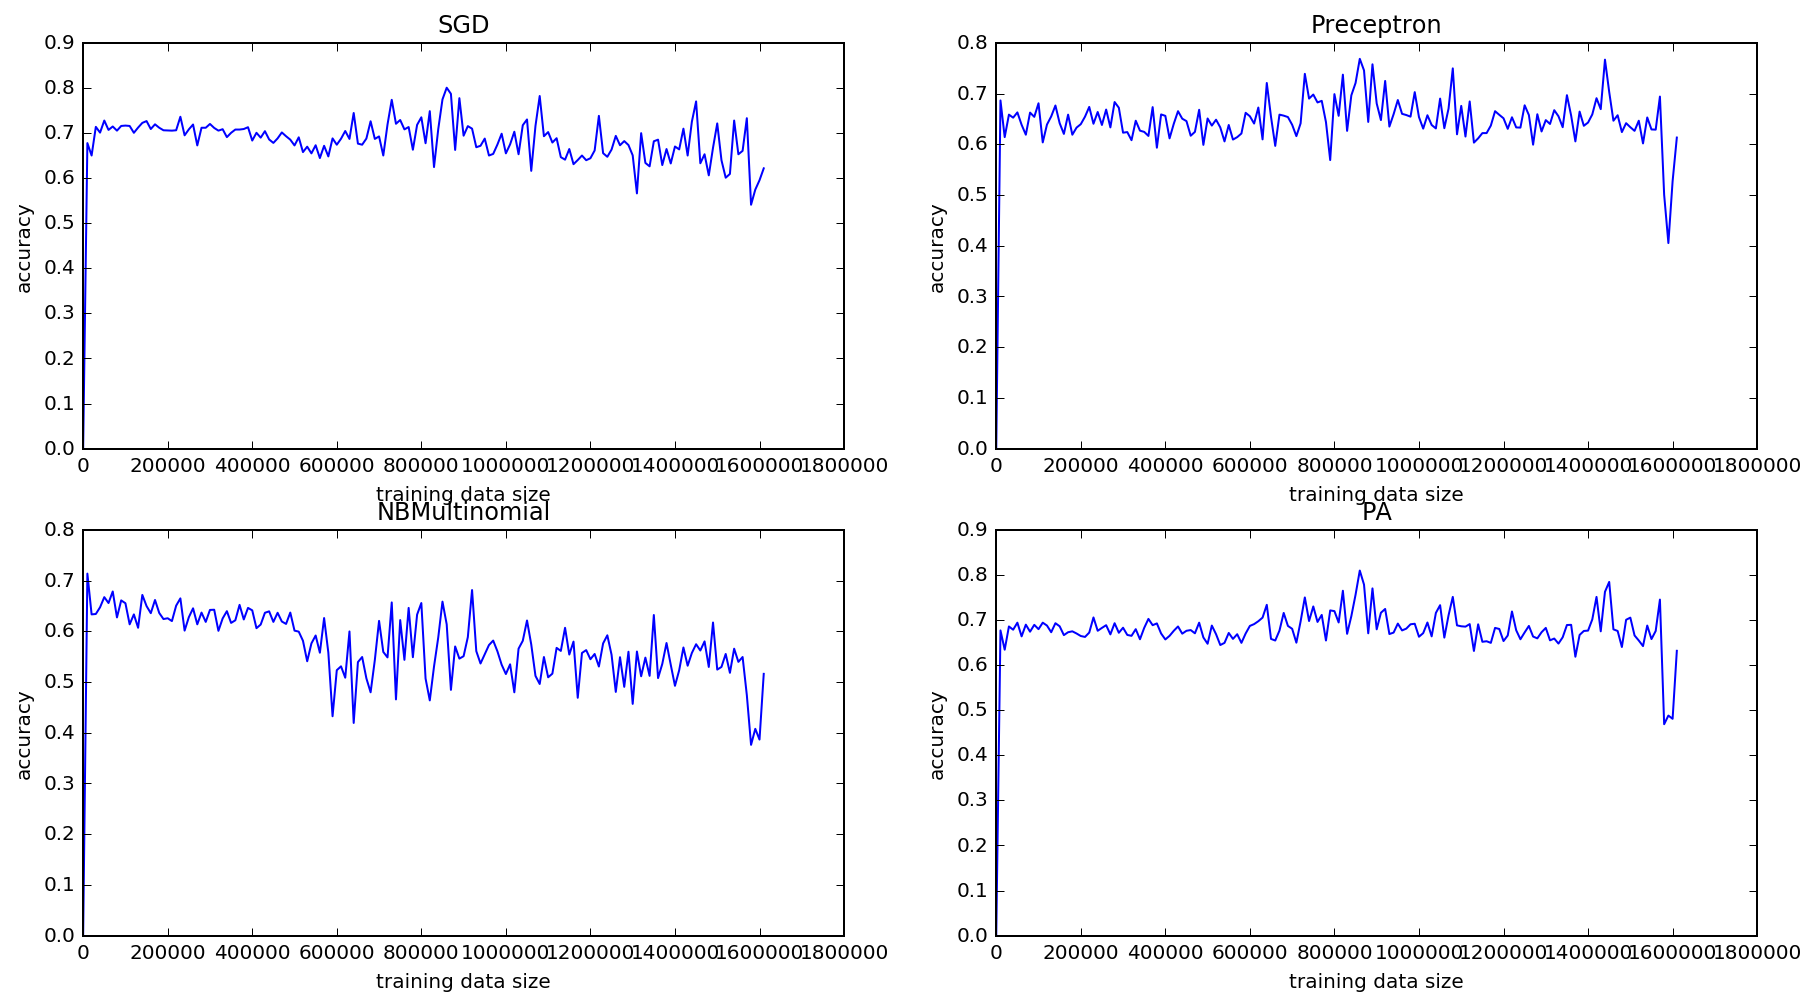

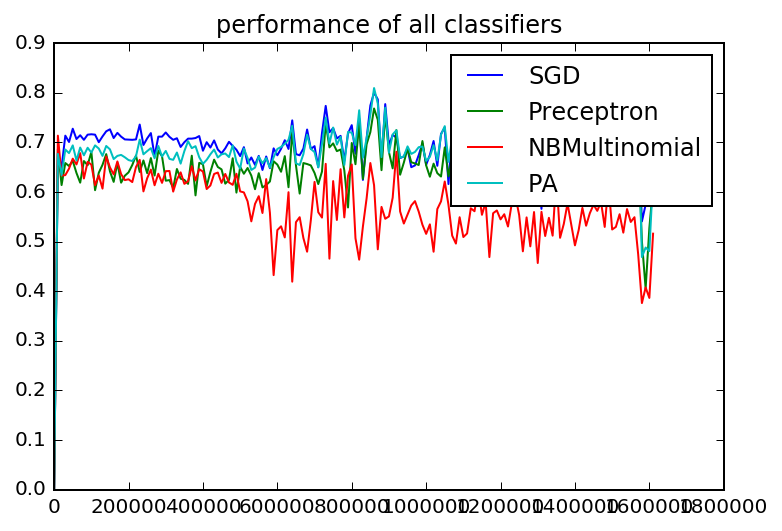

In [75]:
#Visualization of performance throughout learning process
accuracies_SGD = [x[0] for x in cls_stats['SGD']['accuracy_history']]
train_SGD = [x[1] for x in cls_stats['SGD']['accuracy_history']]
accuracies_Perceptron = [x[0] for x in cls_stats['Perceptron']['accuracy_history']]
train_Perceptron = [x[1] for x in cls_stats['Perceptron']['accuracy_history']]
accuracies_NBMultinomial = [x[0] for x in cls_stats['NB Multinomial']['accuracy_history']]
train_NBMultinomial = [x[1] for x in cls_stats['NB Multinomial']['accuracy_history']]
accuracies_Passive_Aggressive = [x[0] for x in cls_stats['Passive-Aggressive']['accuracy_history']]
train_Passive_Aggressive = [x[1] for x in cls_stats['Passive-Aggressive']['accuracy_history']]


titles = ["SGD","Preceptron", "NB Miltinomial", "Passive-Agressive"]
accuracies=[accuracies_SGD,accuracies_Perceptron,accuracies_NBMultinomial,accuracies_Passive_Aggressive]
train=[train_SGD,train_Perceptron,train_NBMultinomial,train_Passive_Aggressive]

n = 4
fig, axes = plt.subplots(2,2, squeeze=True, figsize=(15, 8))
for i in range(n):
    axes[i//2,i%2].plot(train[i],accuracies[i])
    axes[i//2,i%2].set_title(titles[i])
    axes[i//2,i%2].set_ylabel("accuracy")
    axes[i//2,i%2].set_xlabel("training data size")

plt.figure()
plt.plot(train_SGD,accuracies_SGD,train_Perceptron,accuracies_Perceptron, train_NBMultinomial,accuracies_NBMultinomial 
         ,train_Passive_Aggressive,accuracies_Passive_Aggressive)
plt.title("performance of all classifiers")
plt.legend(titles)
  

** Binary data **

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB

test_stats = {'n_test': 0, 'n_test_pos': 0}
def progress(cls_name, stats):
    """Report progress information, return a string."""
    duration = time.time() - stats['t0']
    s = "%20s classifier : \t" % cls_name
    s += "%(n_train)6d train docs (%(n_train_pos)6d positive) " % stats
    s += "%(n_test)6d test docs (%(n_test_pos)6d positive) " % test_stats
    s += "accuracy: %(accuracy).3f " % stats
    s += "in %.2fs (%5d docs/s)" % (duration, stats['n_train'] / duration)
    return s


#Overall_data = [SAT_data,Amazon_data,polarity_data,review_data]
Overall_data = [SAT_data,polarity_data]
batches = []
Y_polarity = np.unique(np.asarray(column(SAT_data,0)))
#Y_amazon = np.unique(np.asarray(column(Amazon_data,0)))
Y_sat = np.unique(np.asarray(column(polarity_data,0)))
#Y_items = np.unique(np.asarray(column(review_data,0)))
#y_all =np.unique(np.concatenate((Y_polarity,Y_amazon,Y_sat,Y_items),axis = 0))
y_all =np.unique(np.concatenate((Y_polarity,Y_sat),axis = 0))
print(y_all)
minibatch_size = 10000

# divide data into batches
i = 0
while (i<len(Overall_data)):
    start = 0
    trans = False
    leftover_len = 0
    while not(trans):
        if not(leftover_len == 0):
            batch = np.concatenate ((leftover , Overall_data[i][start:start + minibatch_size - leftover_len]), axis = 0)
            batches.append(batch)
            start = start + minibatch_size - leftover_len
            leftover_len = 0
        elif not (start + minibatch_size >= len(Overall_data[i]) ):
            batch = Overall_data[i][start:start + minibatch_size]
            batches.append(batch)
            start = start + minibatch_size
        else: 
            leftover_len = len(Overall_data[i]) - start
            leftover = Overall_data[i][start:]
            trans = True
            start = 0
            
        
    i += 1

        
#Classifiers      
partial_fit_classifiers2 = {
    'SGD': SGDClassifier(),
    'Perceptron': Perceptron(),
    'NB Multinomial': MultinomialNB(alpha=0.01),
    'Passive-Aggressive': PassiveAggressiveClassifier(),
}
        
                  
cls_stats2 = {}

for cls_name in partial_fit_classifiers2:
    stats2 = {'n_train': 0, 'n_train_pos': 0,
             'accuracy': 0.0, 'accuracy_history': [(0, 0)], 't0': time.time(),
             'runtime_history': [(0, 0)], 'total_fit_time': 0.0}
    cls_stats2[cls_name] = stats2

number_minibatch = len(batches)
total_vect_time = 0.0
    
print(number_minibatch)
# Main loop : iterate on mini-batches of examples
for i in range(number_minibatch):
    print("Batch number = {}".format(i))
    batch = batches[i]
    textset = column(batch,1)
    filtered=[]
    for item in textset:
        words = word_tokenize(item)
        words =[word.lower() for word in words]
        filtered_item=[];
        for w in words:
            if w not in stop_words:
                filtered_item.append(w)
        result = ' '.join(filtered_item)
        filtered.append(result)
    X, vocab = compute_bag_of_words(filtered, nwords)
    Y = column(batch,0)

    cutoff = math.ceil(len(Y)*0.75)
    X_train = X[0:cutoff]
    X_test = X[cutoff:]
    y_train = Y[0:cutoff]
    y_test = Y[cutoff:]
    test_stats['n_test'] += len(y_test)
    test_stats['n_test_pos'] += sum([int(x) for x in y_test])
    
    for cls_name, cls in partial_fit_classifiers2.items():
        tick = time.time()
        # update estimator with examples in the current mini-batch
        cls.partial_fit(X_train, y_train, classes=y_all)

        # accumulate test accuracy stats
        cls_stats2[cls_name]['total_fit_time'] += time.time() - tick
        cls_stats2[cls_name]['n_train'] += X_train.shape[0]
        cls_stats2[cls_name]['n_train_pos'] += sum([int(x) for x in y_train])
        tick = time.time()

        cls_stats2[cls_name]['accuracy'] = cls.score(X_test, y_test)
        cls_stats2[cls_name]['prediction_time'] = time.time() - tick
        acc_history = (cls_stats2[cls_name]['accuracy'],
                       cls_stats2[cls_name]['n_train'])
        cls_stats2[cls_name]['accuracy_history'].append(acc_history)
        run_history = (cls_stats2[cls_name]['accuracy'],
                       total_vect_time + cls_stats2[cls_name]['total_fit_time'])
        cls_stats2[cls_name]['runtime_history'].append(run_history)

        if i % 10 == 0:
            print(progress(cls_name, cls_stats2[cls_name]))
    if i % 3 == 10:
        print('\n')

In [ ]:
accuracies_SGD = [x[0] for x in cls_stats2['SGD']['accuracy_history']]
train_SGD = [x[1] for x in cls_stats2['SGD']['accuracy_history']]
accuracies_Perceptron = [x[0] for x in cls_stats2['Perceptron']['accuracy_history']]
train_Perceptron = [x[1] for x in cls_stats2['Perceptron']['accuracy_history']]
accuracies_NBMultinomial = [x[0] for x in cls_stats2['NB Multinomial']['accuracy_history']]
train_NBMultinomial = [x[1] for x in cls_stats2['NB Multinomial']['accuracy_history']]
accuracies_Passive_Aggressive = [x[0] for x in cls_stats2['Passive-Aggressive']['accuracy_history']]
train_Passive_Aggressive = [x[1] for x in cls_stats2['Passive-Aggressive']['accuracy_history']]


titles = ["SGD","Preceptron", "NB Miltinomial", "Passive-Agressive"]
accuracies=[accuracies_SGD,accuracies_Perceptron,accuracies_NBMultinomial,accuracies_Passive_Aggressive]
train=[train_SGD,train_Perceptron,train_NBMultinomial,train_Passive_Aggressive]

n = 4
fig, axes = plt.subplots(2,2, squeeze=True, figsize=(15, 8))
for i in range(n):
    axes[i//2,i%2].plot(train[i],accuracies[i])
    axes[i//2,i%2].set_title(titles[i])
    axes[i//2,i%2].set_ylabel("accuracy")
    axes[i//2,i%2].set_xlabel("training data size")

plt.figure()
plt.plot(train_SGD,accuracies_SGD,train_Perceptron,accuracies_Perceptron, train_NBMultinomial,accuracies_NBMultinomial 
         ,train_Passive_Aggressive,accuracies_Passive_Aggressive)
plt.title("performance of all classifiers")
plt.legend(titles)

# Political posts from Facebook and Twitter 

Goal: collect comments from political posts on Facebook and Twitter to evaluate the response of the audience (positive,negative).

## Facebook

In [425]:
import configparser

credentials = configparser.ConfigParser()
credentials.read('credentials.ini')
token = credentials.get('facebook', 'token')

import requests  
import facebook 
import pandas as pd
from IPython.display import display
import os

#testing with EPFL page, run it with the page of a politician's page
page = 'EPFL.ch'   #nb comments #nb likes #location  #comments likes 
postId= 10155100406682590

In [426]:
#prepare data
from datetime import datetime

def convert_time(row):
    return datetime.strptime(row, '%Y-%m-%dT%H:%M:%S+0000')

In [427]:
def getAllComments(postId,nb_comments_per_post,serie,fb):
    fields_comments = 'comment_count,like_count,created_time,message'
    url_comments = 'https://graph.facebook.com/{}/comments/?fields={}&access_token={}'.format(postId, fields_comments, token)
    
    comment =0
    #print(nb_comments_per_post)
    while comment <= nb_comments_per_post + 1:
    
        post_comments=requests.get(url_comments).json()
        
        
        #print('len ',len(post_comments['data']))
        i=0
        for com in post_comments['data']:
            i=i+1
           
            comment_message=com['message']
            comment_message=comment_message.replace('\n',' ')
            serie['comment message'] = comment_message
            serie['comment time'] = com['created_time']
            serie['comment likes'] =  com['like_count']
            serie['comment id']=com['id']

            fb = fb.append(serie, ignore_index=True)
            comment=comment+1
        #print('i',i)
        #print(fb['comment message'])
        try:
            url_comments = post_comments['paging']['next']
        except KeyError:
            
            break
    
    return fb
        
    
    

In [428]:

def lastPostsReactions(page,filename,n):
    fields = 'id,created_time,message,likes.limit(0).summary(1),comments.limits(0).summary(1)'
    url = 'https://graph.facebook.com/{}/posts?fields={}&access_token={}'.format(page, fields, token)

    fb = pd.DataFrame(columns=['post message','post id','post time','post likes','nb of comments','comment id', 'comment message', 'comment time', 'comment likes'])# 'user name']) #'age', 'gender','location','political','religion','education'])
    serie={'post message':[],'post id':[],'post time':[],'post likes':[],'nb of comments':[],'comment id':[],'comment message':[],'comment time':[], 'comment likes':[]}#,'user name':[]} # 'age':[], 'gender':[],'location':[],'political':[],'religion':[],'education':[]};
    
    i=0
    while i < n: #len(fb) < n:
    
        posts = requests.get(url).json()
        
        # extract information for each of the received post
        for post in posts['data']:
           
            try:
                # Only work with posts with text.
                post_message = post['message']
                postId=post['id']
                try:
                    # Only work with posts with comments which have text.
                    nb_comments_per_post=post['comments']['summary']['total_count']
                
                    x= post['comments']['data'][0]['message'] #IndexError if no comment on the page, only work with posts
                    # which have at least 1 comment
                    i=i+1
    
                    post_message=post['message']
                    post_message=post_message.replace('\n',' ')
                    serie['post message']=post_message
                    serie['post time']=post['created_time']
                    serie['post likes']=post['likes']['summary']['total_count']
                    serie['nb of comments']= post['comments']['summary']['total_count']
                    serie['post id']=post['id']
                    
                    fb = getAllComments(post['id'],nb_comments_per_post,serie,fb)
                                                     
                except IndexError or KeyError:
                    continue 
            except KeyError:
                continue       
        try:
            url = posts['paging']['next']
            #print('next')
        except KeyError:
            #print('no next')
            break
            
    fb['comment message'] = fb['comment message'].astype(str)
    fb['post message'] = fb['post message'].astype(str)
    fb['comment likes']  = fb['comment likes'].astype(int)
    fb['post likes']  = fb['post likes'].astype(int)
    fb['nb of comments']  = fb['nb of comments'].astype(int)
    fb['post time'] = fb['post time'].apply(convert_time)
    fb['comment time'] = fb['comment time'].apply(convert_time)

    print("Number of posts: ",i)
    display(fb[:])
    
    folder = os.path.join('..', 'data', 'social_media')
    try:
        os.makedirs(folder)
    except FileExistsError:
        pass

    filename = os.path.join(folder, 'facebook'+ filename +'.sqlite')
    fb.to_sql('facebook', 'sqlite:///' + filename, if_exists='replace')
        
                               
                               
    return fb
 


In [429]:
def postReactions (postId,filename):
    fields = 'id,created_time,message,likes.limit(0).summary(1),comments.limits(0).summary(1)'
    url = 'https://graph.facebook.com/{}?fields={}&access_token={}'.format(postId, fields, token)

    fb = pd.DataFrame(columns=['post message','post id','post time','post likes','nb of comments','comment id', 'comment message', 'comment time', 'comment likes'])# 'user name']) #'age', 'gender','location','political','religion','education'])
    serie={'post message':[],'post id':[],'post time':[],'post likes':[],'nb of comments':[],'comment id':[],'comment message':[],'comment time':[], 'comment likes':[]}#,'user name':[]} # 'age':[], 'gender':[],'location':[],'political':[],'religion':[],'education':[]};
    
    post = requests.get(url).json()
    
    try:
        # Only work with posts with text.
        test = post['message']
        
        try:
            # Only work with posts with comments which have text.
            nb_comments_per_post=post['comments']['summary']['total_count']
            #print(nb_comments_per_post,' comments')
                
            x= post['comments']['data'][0]['message'] #IndexError if no comment on the page, only work with posts
            # which have at least 1 comment
            
            post_message=post['message']
            post_message=post_message.replace('\n',' ')
            serie['post message']=post_message
            serie['post time']=post['created_time']
            serie['post likes']=post['likes']['summary']['total_count']
            serie['nb of comments']= post['comments']['summary']['total_count']
            serie['post id']=post['id']
        
            fb = getAllComments(postId,nb_comments_per_post,serie,fb)
                                     
        except IndexError or KeyError:
            print('')
    except KeyError:
        print('')

            
    fb['comment message'] = fb['comment message'].astype(str)
    fb['post message'] = fb['post message'].astype(str)
    fb['comment likes']  = fb['comment likes'].astype(int)
    fb['post likes']  = fb['post likes'].astype(int)
    fb['nb of comments']  = fb['nb of comments'].astype(int)
    fb['post time'] = fb['post time'].apply(convert_time)
    fb['comment time'] = fb['comment time'].apply(convert_time)
    
    display(fb[:])
    
    folder = os.path.join('..', 'data', 'social_media')
    try:
        os.makedirs(folder)
    except FileExistsError:
        pass

    filename = os.path.join(folder, 'facebook'+ filename +'.sqlite')
    fb.to_sql('facebook', 'sqlite:///' + filename, if_exists='replace')

    
    return 
 


    

In [431]:
#test
fb = lastPostsReactions(page,'EPFL',20)
#fb= postReactions(postId,'Monde')

Number of posts:  21


,post message,post id,post time,post likes,nb of comments,comment id,comment message,comment time,comment likes
0,"Slowing the aging process, improving data secu...",107201356009441_1435535339842696,2017-01-03 10:41:07,101,2,1435535339842696_1439416362787927,Mon fils est paraplégique est si jamais vous a...,2017-01-07 00:21:04,0
1,"Slowing the aging process, improving data secu...",107201356009441_1435535339842696,2017-01-03 10:41:07,101,2,1435535339842696_1435977599798470,Impressive achievements !,2017-01-03 19:46:55,0
2,EPFL wishes you all the best for 2017! L'EPFL...,107201356009441_1425907780805452,2016-12-31 13:15:01,253,5,1425907780805452_1432563033473260,Daniele questa è la scuola,2016-12-31 14:16:56,0
3,EPFL wishes you all the best for 2017! L'EPFL...,107201356009441_1425907780805452,2016-12-31 13:15:01,253,5,1425907780805452_1432785433451020,Bonne Année!,2016-12-31 18:11:30,0
4,EPFL wishes you all the best for 2017! L'EPFL...,107201356009441_1425907780805452,2016-12-31 13:15:01,253,5,1425907780805452_1432621903467373,Happy new year ❤🍀🍀🍀🤓,2016-12-31 15:31:01,0
5,EPFL wishes you all the best for 2017! L'EPFL...,107201356009441_1425907780805452,2016-12-31 13:15:01,253,5,1425907780805452_1432546453474918,happy new year,2016-12-31 13:56:46,0
6,EPFL wishes you all the best for 2017! L'EPFL...,107201356009441_1425907780805452,2016-12-31 13:15:01,253,5,1425907780805452_1432709770125253,I'm proud to be part of it !,2016-12-31 16:51:42,0
7,"Plongez à 360° dans les montagnes du Tessin, a...",107201356009441_1430591847003712,2016-12-29 14:05:38,86,4,1430591847003712_1430728863656677,"Thomas, Das ist was Ich meine.",2016-12-29 16:40:50,0
8,"Plongez à 360° dans les montagnes du Tessin, a...",107201356009441_1430591847003712,2016-12-29 14:05:38,86,4,1430591847003712_1430688826994014,Bello!,2016-12-29 15:46:12,0
9,"Plongez à 360° dans les montagnes du Tessin, a...",107201356009441_1430591847003712,2016-12-29 14:05:38,86,4,1430591847003712_1430934943636069,Sergio Monticciolo,2016-12-29 21:59:25,0


## Twitter


In [290]:
import tweepy  

auth = tweepy.OAuthHandler(credentials.get('twitter', 'consumer_key'), credentials.get('twitter', 'consumer_secret'))
auth.set_access_token(credentials.get('twitter', 'access_token'), credentials.get('twitter', 'access_secret'))
api = tweepy.API(auth)

n=20;

user = 'EPFL_en'
tweetId =808587395163635712

In [291]:


def lastTweetsReactions(user):
    tw = pd.DataFrame(columns=['comment message', 'post message', 'post time', 'user name','location']) #'age', 'gender','location','political','religion','education'])
    serie={'comment message':[],'post message':[],'post time':[],'user name':[],'location':[]}# 'age':[], 'gender':[],'location':[],'political':[],'religion':[],'education':[]};

    i=0
    for tweet in tweepy.Cursor(api.user_timeline, screen_name=user).items(n):
        i=i+1
        print('tweet n°', i, ":",tweet.id_str)
        print(tweet.text)
        tweet.id_str
        username= tweet.user.name
        user_name="@" + username

        searched_tweets = api.search(user_name,since_id=tweet.id_str, count = 100)

        serie['post message']=tweet.text
        serie['post time']=tweet.created_at

        j=0
        for answer_tweet in searched_tweets:
            if (answer_tweet.in_reply_to_status_id == tweet.id_str):
                j=j+1
                serie['comment message']= answer_tweet.text
                serie['user name']=answer_tweet.user.name
                lat = answer_tweet.lat
                long = answer_tweet.long
                serie['location']=[lat, long]
        print("Number of responses:", j) 

        tw['comment message'] = tw['comment message'].astype(str)
        tw['post message'] = tw['post message'].astype(str)
        tw = tw.append(serie, ignore_index=True)
        
    return(tw)

In [292]:
def tweetReactions(tweetId):
    tw = pd.DataFrame(columns=['comment message', 'post message', 'post time', 'user name','location']) #'age', 'gender','location','political','religion','education'])
    serie={'comment message':[],'post message':[],'post time':[],'user name':[],'location':[]}# 'age':[], 'gender':[],'location':[],'political':[],'religion':[],'education':[]};

    tweet=api.get_status(tweetId)
        
    print("tweet n°:",tweetId)
    
    username= tweet.user.screen_name
    user_name="@" + username
    print("username", user_name)
    print(tweet.text)

    searched_tweets = api.search(user_name, since_id=tweetId)
    #print(searched_tweets)

    serie['post message']=tweet.text
    serie['post time']=tweet.created_at

    j=0
    for answer_tweet in searched_tweets:
        #j=j+1
        #print(answer_tweet.text)
        if (answer_tweet.in_reply_to_status_id == tweetId):
            j=j+1
            print(answer_tweet.text)
            serie['comment message']= answer_tweet.text
            serie['user name']=answer_tweet.user.name
            #lat = api.get_status(answer_tweet.id).lat
            #long = answer_tweet.long
            #serie['location']=[lat, long]
            tw = tw.append(serie, ignore_index=True)
                
    print("Number of searched tweets:", j) 
    if(j==0):
        tw = tw.append(serie, ignore_index=True)
    tw['comment message'] = tw['comment message'].astype(str)
    tw['post message'] = tw['post message'].astype(str)
        
    return(tw)

In [293]:
tw = tweetReactions(tweetId)
tw[:]

tweet n°: 808587395163635712
username @Maitre_Eolas
Je détecte une tendance préoccupante sur Twitter et ailleurs : prendre une décision de justice,…
Number of searched tweets: 0


,comment message,post message,post time,user name,location
0,[],Je détecte une tendance préoccupante sur Twitt...,2016-12-13 08:20:32,[],[]
